This is the LSTM Model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import preprocess, predictions, is_gpu_working, visualize

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 7.0)
#is_gpu_working()

In [2]:
print(tf.__version__)

2.5.1


In [3]:
window_in = 7
window_out = 1
colsx = ['Cumulative True Cases','Free','Positively Tested','CR', 'Series_No']
colsy = ['Cumulative True Cases','Free','Positively Tested', 'Series_No']
input_shape = (window_in, len(colsx) - 1)
x_train, y_train, x_test, y_test, len_of_ser, num_windows_ser = preprocess(dataframe_csvpath = "data.csv", 
    cols_x = colsx, 
    cols_y = colsy, 
    window_in = window_in, 
    window_out = window_out, 
    data_div_frac = 0.99, 
    popu_size = 80000
)

In [8]:
def LSTM_MODEL():
    model = keras.Sequential(
        [
                               layers.Bidirectional(layers.LSTM(128, return_sequences=True, input_shape = input_shape, activation='selu')),
                               layers.Bidirectional(layers.LSTM(256, return_sequences=True, activation='selu')),
                               layers.Bidirectional(layers.LSTM(128, return_sequences=False, activation='relu')),
                               layers.Dense(window_out * (len(colsy)-1)),
                               layers.Reshape((window_out, (len(colsy )-1)))
        ]
    )
    
    return model 

model = LSTM_MODEL()


In [9]:
model.compile(
    loss = 'mae',
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.fit(
    x_train,
    y_train,
    batch_size = num_windows_ser,
    epochs = 30,
    verbose = 2
)
print(model.summary())
model.evaluate(x_test, y_test, batch_size = num_windows_ser, verbose = 2)

Epoch 1/30
1930/1930 - 150s - loss: 0.0014 - accuracy: 0.8457
Epoch 2/30
1930/1930 - 142s - loss: 5.9811e-04 - accuracy: 0.8792
Epoch 3/30
1930/1930 - 142s - loss: 4.6859e-04 - accuracy: 0.9004
Epoch 4/30
1930/1930 - 142s - loss: 4.1488e-04 - accuracy: 0.9028
Epoch 5/30
1930/1930 - 142s - loss: 3.6631e-04 - accuracy: 0.9116
Epoch 6/30
1930/1930 - 142s - loss: 3.2846e-04 - accuracy: 0.9184
Epoch 7/30
1930/1930 - 141s - loss: 3.1385e-04 - accuracy: 0.9156
Epoch 8/30
1930/1930 - 140s - loss: 2.9143e-04 - accuracy: 0.9158
Epoch 9/30
1930/1930 - 140s - loss: 2.9349e-04 - accuracy: 0.9121
Epoch 10/30
1930/1930 - 140s - loss: 2.5860e-04 - accuracy: 0.9186
Epoch 11/30
1930/1930 - 140s - loss: 2.6045e-04 - accuracy: 0.9187
Epoch 12/30
1930/1930 - 140s - loss: 2.4122e-04 - accuracy: 0.9227
Epoch 13/30
1930/1930 - 142s - loss: 2.4374e-04 - accuracy: 0.9216
Epoch 14/30
1930/1930 - 142s - loss: 2.2460e-04 - accuracy: 0.9250
Epoch 15/30
1930/1930 - 141s - loss: 2.2369e-04 - accuracy: 0.9271
Epoch 16

[0.00018623413052409887, 1.0]

In [10]:
y_pred, mae = predictions(x_test, y_test, model, len_of_ser, num_windows_ser, window_in = 7, window_out = 1)

The mean absolute error is:  tf.Tensor(62.98300688186808, shape=(), dtype=float64)


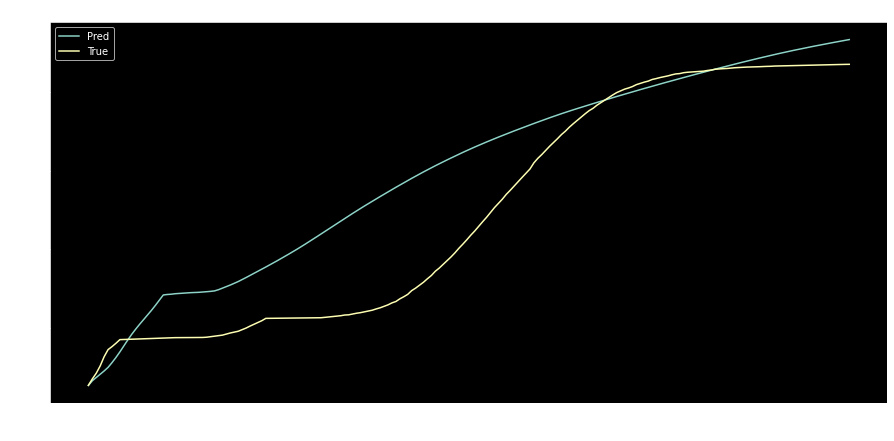

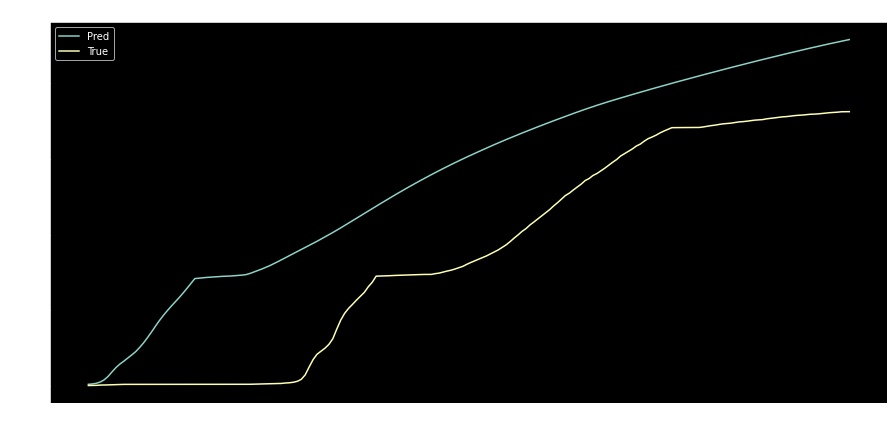

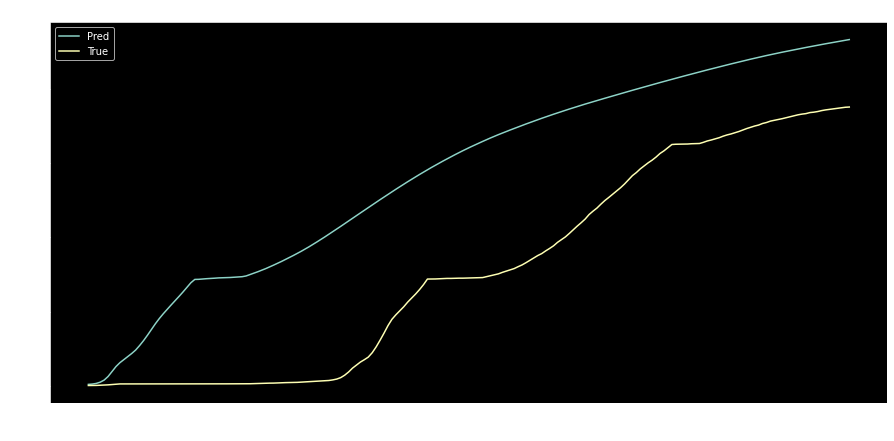

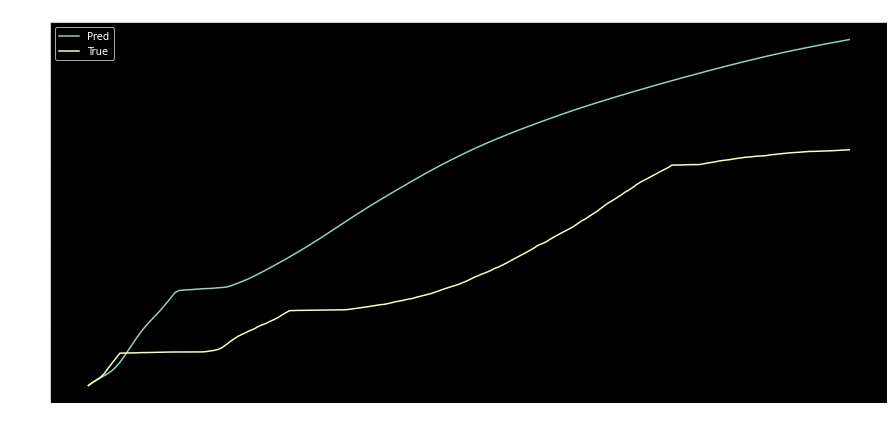

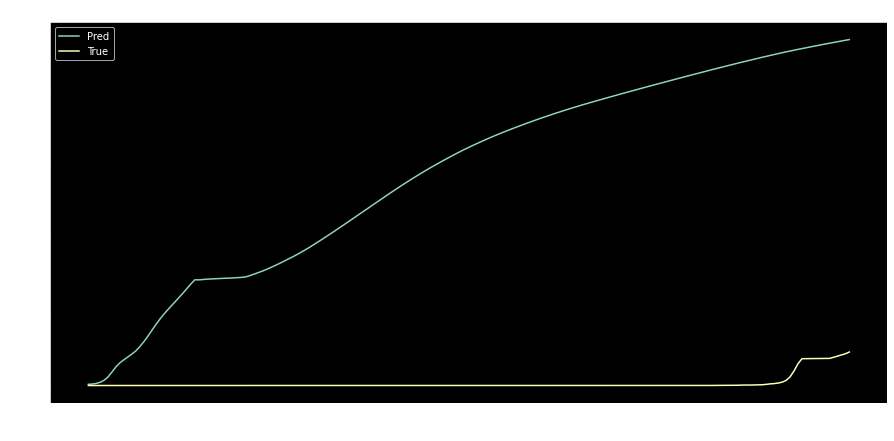

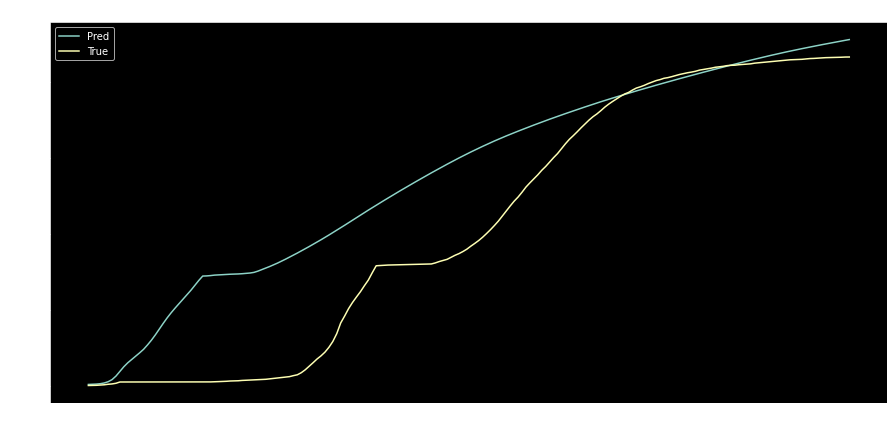

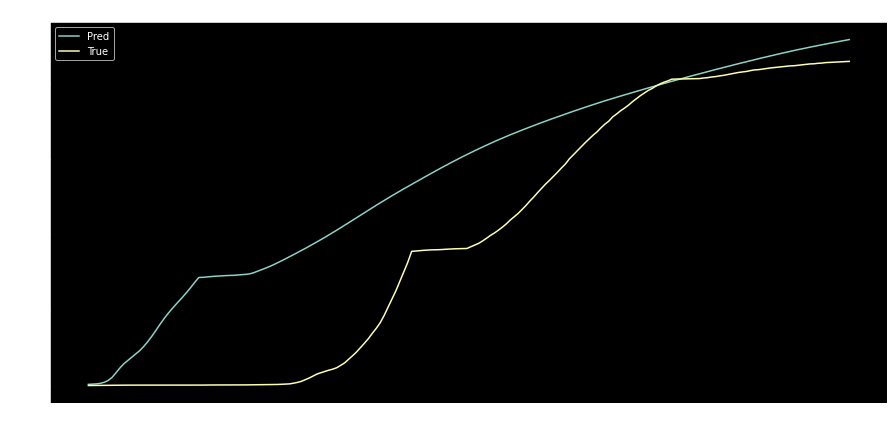

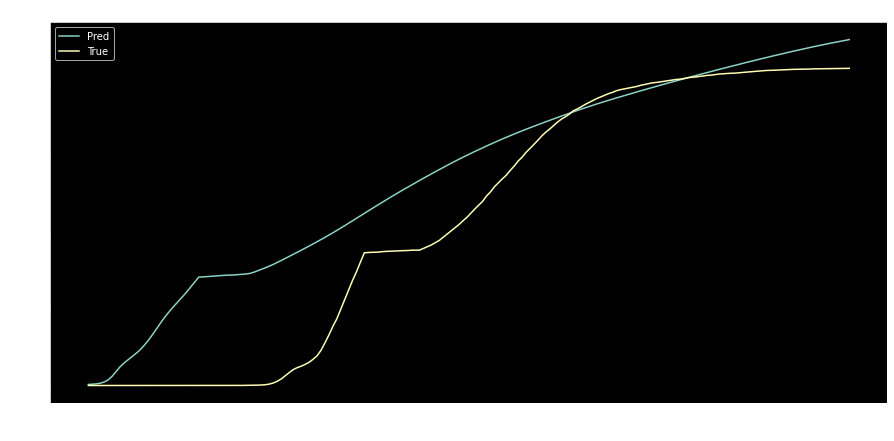

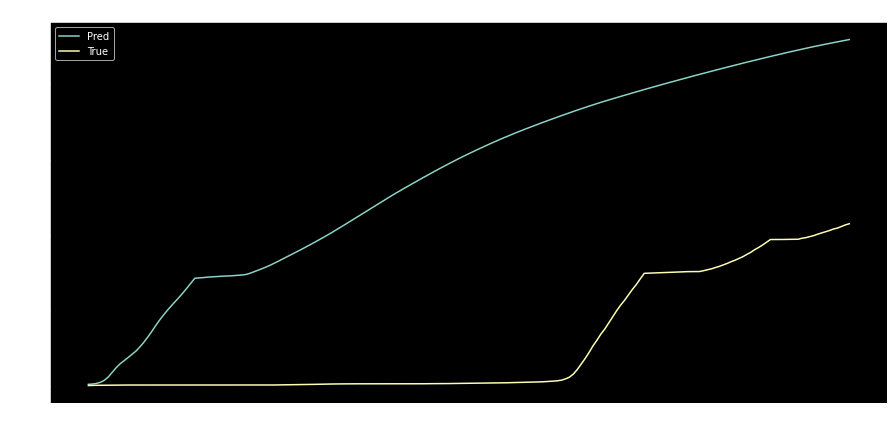

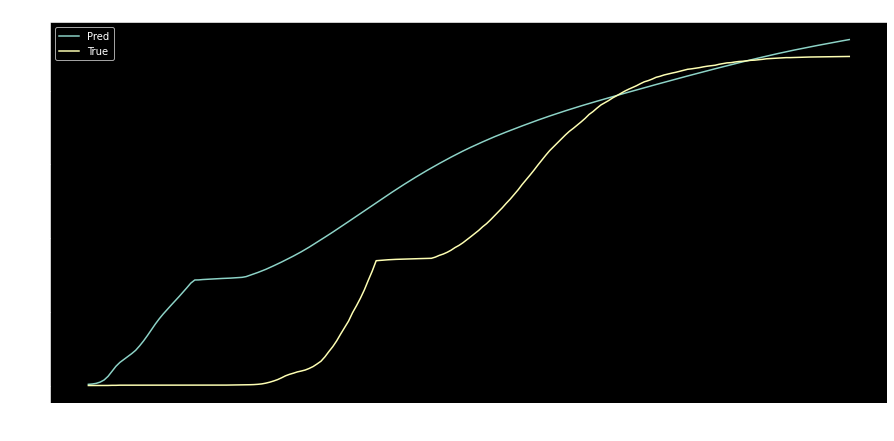

In [11]:
visualize(y_test, y_pred, x_test, window_out = window_out, num_plots = 10, num_win_ser = num_windows_ser, cols_y = colsy, col_idx = 0)